## Worksheet 06
***

### Red Card Study

In [30]:
import os

import numpy as np
import random
import scipy.stats.mstats as ssm
from scipy.stats import gaussian_kde as kde

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load data
filename = os.path.join('data', 'CrowdstormingDataJuly1st.csv')
df = pd.read_csv(filename)

A referee-player dyad describes the interactions between a particular ref and one player. This means that each row in the dataset is of a unique player-ref combination, listing all of the games by a given player with a particular referee at any point in his career.

Let's have a look at the first few rows of the data set to have a better understanding

In [3]:
df.iloc[:10, :]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [13]:
# Data Disaggregation
dfd = df.copy()
# Add new variables
dfd['skintone'] = (dfd['rater1'] + dfd['rater2']) / 2
dfd['allreds'] = dfd['yellowReds'] + dfd['redCards']
dfd['allredsStrict'] = dfd['allreds']
dfd['refCount'] = 0

# Add new feature tracking number of games per ref
refs = np.unique(dfd['refNum'].values.ravel) # List all unique ref IDs

# Count dyads per ref
for r in refs:
    dfd['refCount'][dfd['refNum'] == r] = len(dfd[dfd['refNum'] == r])
    
col_names = list(dfd.columns)

j = 0
out = [0 for _ in range(sum(dfd['games']))]
for _, row in dfd.iterrows():
    n = row['games']
    c = row['allreds']
    d = row['allredsStrict']
    
    for _ in range(n):
        row['allreds'] = 1 if (c - _) > 0 else 0
        row['allredsStrict'] = 1 if (d - _) > 0 else 0
        rowlist=list(row)
        out[j] = rowlist
        j += 1

<ipython-input-13-a29c9c408a3a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['refCount'][dfd['refNum'] == r] = len(dfd[dfd['refNum'] == r])


In [27]:
allRefs = dfd.refNum.value_counts()
print("Number of refs =", len(allRefs))
print("Number of dyads in the dataset =", sum(allRefs))
print("Median number of dyads per referee =", np.median(allRefs))

Number of refs = 3147
Number of dyads in the dataset = 146028
Median number of dyads per referee = 8.0


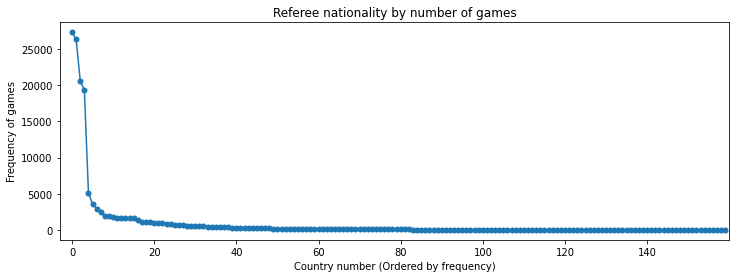

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
x = dfd.Alpha_3.value_counts()
lines = ax.plot(x, marker='.', ms=10)
y = x.index.tolist()

ax.set_title('Referee nationality by number of games')
ax.set_xlabel('Country number (Ordered by frequency)')
ax.set_ylabel('Frequency of games')
ax.set_xlim([-3,160])
ax.set_xticks(np.arange(0, 160, step=20))
ax.set_xticklabels(np.arange(0, 160, step=20))

plt.show()

In [28]:
# Refs country frequency 'Alpha_3'


DEU     27317
ENGL    26316
FRA     20599
ESP     19355
Name: Alpha_3, dtype: int64


['DEU',
 'ENGL',
 'FRA',
 'ESP',
 'ITA',
 'NLD',
 'PRT',
 'BEL',
 'SCOT',
 'CHE',
 'SWE',
 'GRC',
 'RUS',
 'NOR',
 'TUR',
 'AUT',
 'DNK',
 'ARG',
 'ROU',
 'POL',
 'BRA',
 'CZE',
 'SVN',
 'HRV',
 'HUN',
 'SVK',
 'IRL',
 'MEX',
 'ISR',
 'USA',
 'LUX',
 'SRB',
 'JPN',
 'UKR',
 'URY',
 'CHL',
 'FIN',
 'PRY',
 'ISL',
 'COL',
 'BGR',
 'MKD',
 'CYP',
 'TUN',
 'EST',
 'PER',
 'AUS',
 'WALES',
 'ZAF',
 'BLR',
 'DZA',
 'CAN',
 'UZB',
 'ECU',
 'SLV',
 'KOR',
 'GTM',
 'LTU',
 'EGY',
 'LVA',
 'MAR',
 'VEN',
 'CMR',
 'SYC',
 'CHN',
 'ARE',
 'GMB',
 'SEN',
 'BOL',
 'MUS',
 'IRN',
 'QAT  ',
 'MLT',
 'CRI',
 'BIH',
 'GEO',
 'SAU',
 'AZE',
 'PAN',
 'CIV',
 'BHR',
 'MNE',
 'SGP',
 'HND',
 'JAM',
 'ZMB',
 'NZL',
 'MYS',
 'Mali',
 'ARM',
 'SUR',
 'BEN',
 'MDA',
 'GHA',
 'LBY',
 'GAB',
 'ALB',
 'AGO',
 'ZWE',
 'SDN',
 'KAZ',
 'OMN',
 'KWT',
 'TTO',
 'UGA',
 'LSO',
 'GIN',
 'BFA',
 'MDG',
 'KEN',
 'PRI',
 'THA',
 'SMR',
 'PYF',
 'JOR',
 'GNQ',
 'ERI',
 'MRT',
 'MWI',
 'NER',
 'ETH',
 'BDI',
 'IND',
 'NAM',
 